# Introduction to Text Analytics and Basic String Handling

Sanjiv R. Das

**Reading references**

- NLTK: http://www.nltk.org/book/
- Introduction to Linguistics: http://www.ling.upenn.edu/courses/Fall_2003/ling001/
- Hugging Face: https://huggingface.co/
- My book on Text Analytics for Finance: http://srdas.github.io/Papers/Das_TextAnalyticsInFinance.pdf
- A history of Information Retrieval, [Harmon (2019)](https://www.nowpublishers.com/article/Details/INR-065); [pdf](https://drive.google.com/file/d/14OVI18rui61vdNOKQCfD7-8CM4wVmYTw/view?usp=sharing)

In [10]:
%%capture
#INCLUDING SCIENTIFIC AND NUMERICAL COMPUTING LIBRARIES
#Run this code to make sure that you have all the libraries at one go.
%pylab inline
import os
!pip install ipypublish
from ipypublish import nb_setup
import pandas as pd
%load_ext rpy2.ipython

# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
os.chdir("drive/My Drive/Teaching/NLP/")

ModuleNotFoundError: No module named 'rpy2'

**Question**: Why has Covid made text analysis in finance more relevant?

## News Analysis for Finance

In Finance, for example, text has become a major source of trading information, leading to a new field known as News Metrics.

News analysis is defined as “the measurement of the various qualitative and quantitative attributes of textual news stories. Some of these attributes are: sentiment, relevance, and novelty. Expressing news stories as numbers permits the manipulation of everyday information in a mathematical and statistical way.” (Wikipedia). 

In this class, we will study frameworks for text analytics techniques that are in widespread use. We will discuss various text analytic methods and software, and then provide a set of metrics that may be used to assess the performance of analytics. Various directions for this field are discussed through the exposition. The techniques herein can aid in the valuation and trading of securities, facilitate investment decision making, meet regulatory requirements, provide marketing insights, or manage risk.

## News Analytics

See: https://www.amazon.com/Handbook-News-Analytics-Finance/dp/047066679X/ref=sr_1_1?ie=UTF8&qid=1466897817&sr=8-1&keywords=handbook+of+news+analytics

“News analytics are used in financial modeling, particularly in quantitative and algorithmic trading. Further, news analytics can be used to plot and characterize firm behaviors over time and thus yield important strategic insights about rival firms. News analytics are usually derived through automated text analysis and applied to digital texts using elements from natural language processing and machine learning such as latent semantic analysis, support vector machines, `bag of words’, among other techniques.” (Wikipedia)

## Text as Data

There are many reasons why text has business value. But this is a narrow view. Textual data provides a means of understanding all human behavior through a data-driven, analytical approach. Let’s enumerate some reasons for this.

- Big Text: there is more textual data than numerical data.
- Text is versatile. Nuances and behavioral expressions are not conveyed with numbers, so analyzing text allows us to explore these aspects of human interaction.
- Text contains emotive content. This has led to the ubiquity of “Sentiment analysis”. See for example: Admati-Pfleiderer 2001; DeMarzo et al 2003; Antweiler-Frank 2004, 2005; Das-Chen 2007; Tetlock 2007; Tetlock et al 2008; Mitra et al 2008; Leinweber-Sisk 2010.
- Text contains opinions and connections. See: Das et al 2005; Das and Sisk 2005; Godes et al 2005; Li 2006; Hochberg et al 2007.
- Numbers aggregate; text disaggregates. Text allows us to drill down into underlying behavior when understanding human interaction.
- Text is forward looking, much more than tabular data. Recent structural shifts in the economy (pandemics, trade wars, etc.) have made unstructured text data relatively more important than structured tabular data.

## Chris Anderson: “Data is the New Theory.” 

In a talk at the 17th ACM Conference on Information Knowledge and Management (CIKM ’08), Google’s director of research Peter Norvig stated his unequivocal preference for data over algorithms—“data is more agile than code.” Yet, it is well-understood that too much data can lead to overfitting so that an algorithm becomes mostly useless out-of-sample. 

## Definition: Text-Mining

- Text mining is the large-scale, automated processing of plain text language in digital form to extract data that is converted into useful quantitative or qualitative information.
- Text mining is automated on big data that is not amenable to human processing within reasonable time frames. It entails extracting data that is converted into information of many types.
- Simple: Text mining may be simple as key word searches and counts.
- Complicated: It may require language parsing and complex rules for information extraction.
- Involves structured text, such as the information in forms and some kinds of web pages.
- May be applied to unstructured text is a much harder endeavor.
- Text mining is also aimed at unearthing unseen relationships in unstructured text as in meta analyses of research papers, see Van Noorden 2012.

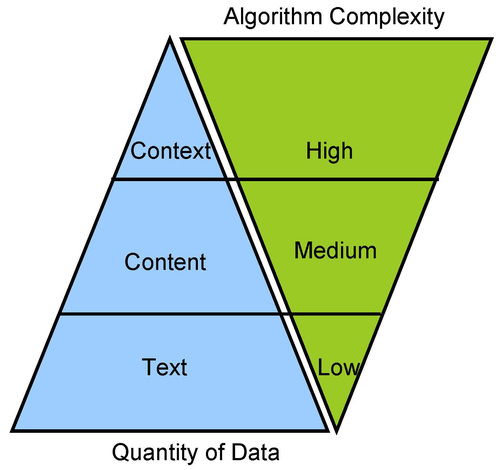

In [ ]:
nb_setup.images_hconcat(["NLP_images/algo_complexity.jpg"], width=500)

## The Response to News
Das, Martinez-Jerez, and Tufano (FM 2005)

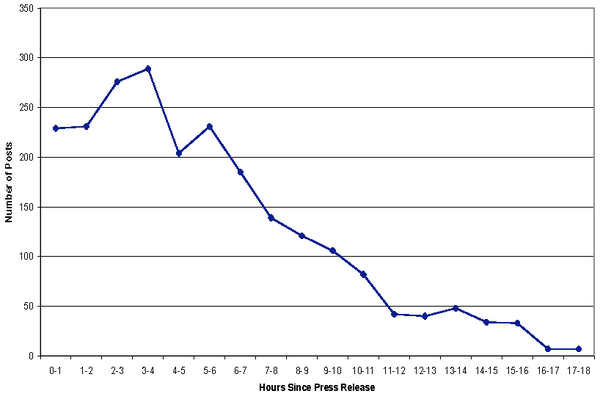

In [ ]:
nb_setup.images_hconcat(["NLP_images/news_cycle.png"], width=600)

## Breakdown of news flow

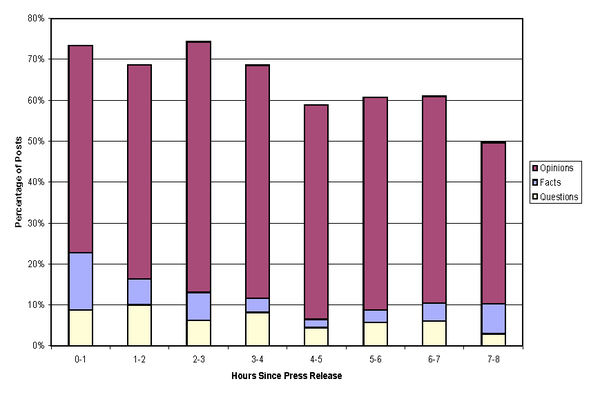

In [ ]:
nb_setup.images_hconcat(["NLP_images/breakdown_newsflow.png"], width=600)

## Frequency of posting

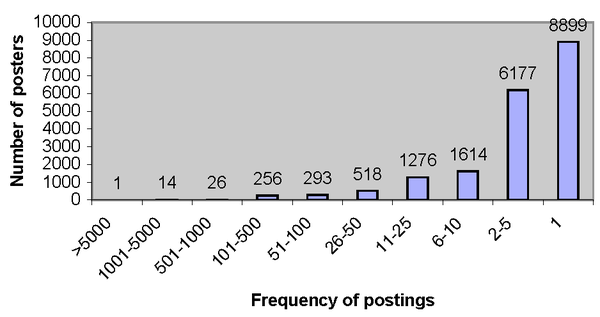

In [ ]:
nb_setup.images_hconcat(["NLP_images/freq_postings.png"], width=600)

## Weekly posting

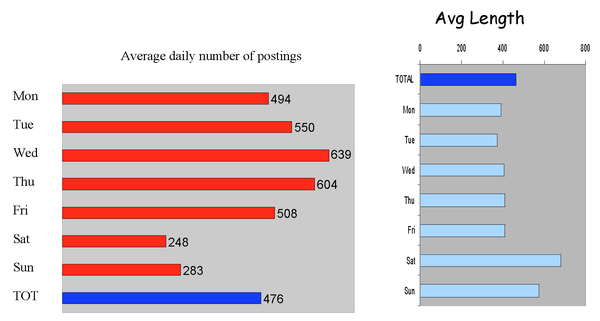

In [ ]:
nb_setup.images_hconcat(["NLP_images/weekly_posting.png"], width=600)

## Intraday posting

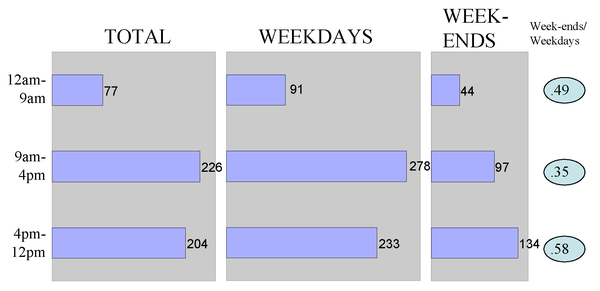

In [ ]:
nb_setup.images_hconcat(["NLP_images/intraday_posting.png"], width=600)

## Number of characters per posting

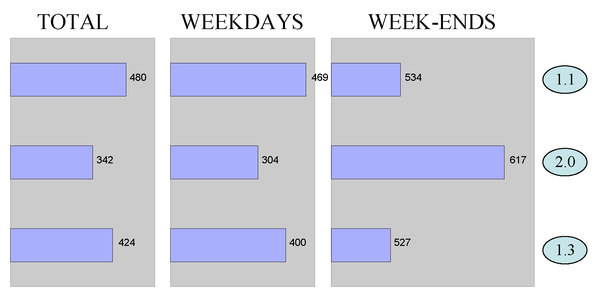

In [ ]:
nb_setup.images_hconcat(["NLP_images/characters_posting.png"], width=600)

## Examples: Basic Text Handling

In [1]:
text = "We the People of the United States, in Order to form a more perfect Union, establish Justice, \
        insure domestic Tranquility, provide for the common defence, promote the general Welfare, \
        and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish \
        this Constitution for the United States of America."

In [2]:
type(text)

str

In [3]:
#How many characters including blanks? 
len(text)

351

In [4]:
#Tokenize the words, separating by spaces, periods, commas
x = text.split(" ")
print(x)

['We', 'the', 'People', 'of', 'the', 'United', 'States,', 'in', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union,', 'establish', 'Justice,', '', '', '', '', '', '', '', '', 'insure', 'domestic', 'Tranquility,', 'provide', 'for', 'the', 'common', 'defence,', 'promote', 'the', 'general', 'Welfare,', '', '', '', '', '', '', '', '', 'and', 'secure', 'the', 'Blessings', 'of', 'Liberty', 'to', 'ourselves', 'and', 'our', 'Posterity,', 'do', 'ordain', 'and', 'establish', '', '', '', '', '', '', '', '', 'this', 'Constitution', 'for', 'the', 'United', 'States', 'of', 'America.']


In [5]:
#How many words?
len(x)

76

But this returns words with commas and periods included, which is not desired. So what we need is the regular expressions package, i.e., **re**. There are several online regex utilities you may use, e.g., https://regex101.com/. 

In [6]:
import re
x = re.split('[ ,.]',text)
print(x)

['We', 'the', 'People', 'of', 'the', 'United', 'States', '', 'in', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union', '', 'establish', 'Justice', '', '', '', '', '', '', '', '', '', 'insure', 'domestic', 'Tranquility', '', 'provide', 'for', 'the', 'common', 'defence', '', 'promote', 'the', 'general', 'Welfare', '', '', '', '', '', '', '', '', '', 'and', 'secure', 'the', 'Blessings', 'of', 'Liberty', 'to', 'ourselves', 'and', 'our', 'Posterity', '', 'do', 'ordain', 'and', 'establish', '', '', '', '', '', '', '', '', 'this', 'Constitution', 'for', 'the', 'United', 'States', 'of', 'America', '']


In [7]:
#Use a list comprehension to remove spaces
x = [j for j in x if len(j)>0]
print(x)

['We', 'the', 'People', 'of', 'the', 'United', 'States', 'in', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union', 'establish', 'Justice', 'insure', 'domestic', 'Tranquility', 'provide', 'for', 'the', 'common', 'defence', 'promote', 'the', 'general', 'Welfare', 'and', 'secure', 'the', 'Blessings', 'of', 'Liberty', 'to', 'ourselves', 'and', 'our', 'Posterity', 'do', 'ordain', 'and', 'establish', 'this', 'Constitution', 'for', 'the', 'United', 'States', 'of', 'America']


In [8]:
len(x)

52

In [11]:
#Unique words
y = [j.lower() for j in x]
z = unique(y)
print(z)

['a' 'america' 'and' 'blessings' 'common' 'constitution' 'defence' 'do'
 'domestic' 'establish' 'for' 'form' 'general' 'in' 'insure' 'justice'
 'liberty' 'more' 'of' 'ordain' 'order' 'our' 'ourselves' 'people'
 'perfect' 'posterity' 'promote' 'provide' 'secure' 'states' 'the' 'this'
 'to' 'tranquility' 'union' 'united' 'we' 'welfare']


In [12]:
len(z)

38

## Using List Comprehensions to find specific words

In [13]:
#Find words greater than 3 characters
[j for j in x if len(j)>3]

['People',
 'United',
 'States',
 'Order',
 'form',
 'more',
 'perfect',
 'Union',
 'establish',
 'Justice',
 'insure',
 'domestic',
 'Tranquility',
 'provide',
 'common',
 'defence',
 'promote',
 'general',
 'Welfare',
 'secure',
 'Blessings',
 'Liberty',
 'ourselves',
 'Posterity',
 'ordain',
 'establish',
 'this',
 'Constitution',
 'United',
 'States',
 'America']

In [14]:
#Find capitalized words
[j for j in x if j.istitle()]

['We',
 'People',
 'United',
 'States',
 'Order',
 'Union',
 'Justice',
 'Tranquility',
 'Welfare',
 'Blessings',
 'Liberty',
 'Posterity',
 'Constitution',
 'United',
 'States',
 'America']

In [15]:
#Find words that begin with c
[j for j in x if j.startswith('c')]

['common']

In [16]:
#Find words that end in t
[j for j in x if j.endswith('t')]

['perfect']

In [17]:
#Find words that contain a
[j for j in x if "a" in set(j.lower())]

['States',
 'a',
 'establish',
 'Tranquility',
 'general',
 'Welfare',
 'and',
 'and',
 'ordain',
 'and',
 'establish',
 'States',
 'America']

## Other Simple Text Functions

In [18]:
#Test type of tokens
print(x)
[j for j in x if j.islower()]

['We', 'the', 'People', 'of', 'the', 'United', 'States', 'in', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union', 'establish', 'Justice', 'insure', 'domestic', 'Tranquility', 'provide', 'for', 'the', 'common', 'defence', 'promote', 'the', 'general', 'Welfare', 'and', 'secure', 'the', 'Blessings', 'of', 'Liberty', 'to', 'ourselves', 'and', 'our', 'Posterity', 'do', 'ordain', 'and', 'establish', 'this', 'Constitution', 'for', 'the', 'United', 'States', 'of', 'America']


['the',
 'of',
 'the',
 'in',
 'to',
 'form',
 'a',
 'more',
 'perfect',
 'establish',
 'insure',
 'domestic',
 'provide',
 'for',
 'the',
 'common',
 'defence',
 'promote',
 'the',
 'general',
 'and',
 'secure',
 'the',
 'of',
 'to',
 'ourselves',
 'and',
 'our',
 'do',
 'ordain',
 'and',
 'establish',
 'this',
 'for',
 'the',
 'of']

In [19]:
print(x)
[j for j in x if j.isdigit()]

['We', 'the', 'People', 'of', 'the', 'United', 'States', 'in', 'Order', 'to', 'form', 'a', 'more', 'perfect', 'Union', 'establish', 'Justice', 'insure', 'domestic', 'Tranquility', 'provide', 'for', 'the', 'common', 'defence', 'promote', 'the', 'general', 'Welfare', 'and', 'secure', 'the', 'Blessings', 'of', 'Liberty', 'to', 'ourselves', 'and', 'our', 'Posterity', 'do', 'ordain', 'and', 'establish', 'this', 'Constitution', 'for', 'the', 'United', 'States', 'of', 'America']


[]

In [20]:
[j for j in x if j.isalnum()]

['We',
 'the',
 'People',
 'of',
 'the',
 'United',
 'States',
 'in',
 'Order',
 'to',
 'form',
 'a',
 'more',
 'perfect',
 'Union',
 'establish',
 'Justice',
 'insure',
 'domestic',
 'Tranquility',
 'provide',
 'for',
 'the',
 'common',
 'defence',
 'promote',
 'the',
 'general',
 'Welfare',
 'and',
 'secure',
 'the',
 'Blessings',
 'of',
 'Liberty',
 'to',
 'ourselves',
 'and',
 'our',
 'Posterity',
 'do',
 'ordain',
 'and',
 'establish',
 'this',
 'Constitution',
 'for',
 'the',
 'United',
 'States',
 'of',
 'America']

## String operations

In [21]:
y = '  To be or not to be.  '
print(y.strip())
print(y.rstrip())
print(y.lstrip())
print(y.lower())
print(y.upper())

To be or not to be.
  To be or not to be.
To be or not to be.  
  to be or not to be.  
  TO BE OR NOT TO BE.  


In [22]:
#Return the starting position of the string
print(y.find('be'))
print(y.rfind('be'))

5
18


In [23]:
print(y.replace('be','do'))

  To do or not to do.  


In [24]:
# At 80 letters, the longest word ever composed in German is 
# "Donaudampfschifffahrtselektrizitätenhauptbetriebswerkbauunterbeamtengesellschaft," 
# meaning, the "Association for Subordinate Officials of the Head Office Management of the 
# Danube Steamboat Electrical Services."
y = 'Donaudampfschifffahrtselektrizitatenhauptbetriebswerkbauunterbeamtengesellschaft'
ytok = y.split('a')
print(ytok)

['Don', 'ud', 'mpfschifff', 'hrtselektrizit', 'tenh', 'uptbetriebswerkb', 'uunterbe', 'mtengesellsch', 'ft']


In [25]:
print('a'.join(ytok))

Donaudampfschifffahrtselektrizitatenhauptbetriebswerkbauunterbeamtengesellschaft


In [26]:
print(list(y))

['D', 'o', 'n', 'a', 'u', 'd', 'a', 'm', 'p', 'f', 's', 'c', 'h', 'i', 'f', 'f', 'f', 'a', 'h', 'r', 't', 's', 'e', 'l', 'e', 'k', 't', 'r', 'i', 'z', 'i', 't', 'a', 't', 'e', 'n', 'h', 'a', 'u', 'p', 't', 'b', 'e', 't', 'r', 'i', 'e', 'b', 's', 'w', 'e', 'r', 'k', 'b', 'a', 'u', 'u', 'n', 't', 'e', 'r', 'b', 'e', 'a', 'm', 't', 'e', 'n', 'g', 'e', 's', 'e', 'l', 'l', 's', 'c', 'h', 'a', 'f', 't']


## Regex

Use regular expressions to help us with more complex parsing. 

Read: https://automatetheboringstuff.com/2e/chapter7/

For example `'@[A-Za-z0-9_]+'` will return all words that: 
* start with `'@'` and are followed by at least one: 
* capital letter (`'A-Z'`)
* lowercase letter (`'a-z'`) 
* number (`'0-9'`)
* or underscore (`'_'`)

Cory Doctorow suggests that we teach regex even before we learn programming. 

## Character codes

- \d, digit 0-9
- \D, not \d, not a numeric digit from 0-9
- \w, any letter, numeric, underscore
- \W, not \w
- \s, space, tab, newline
- \S, not \s

In [27]:
#Find words that contain 'a' using RE
# Remember x was the list of words from the first paragraph of the constitution
import re
[j for j in x if re.search('[Aa]',j)] 

['States',
 'a',
 'establish',
 'Tranquility',
 'general',
 'Welfare',
 'and',
 'and',
 'ordain',
 'and',
 'establish',
 'States',
 'America']

In [28]:
# Checking for phone number patterns
pattern = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
res = pattern.search('Call me at 408-554-4000 for SCU')
print(res)
print(res.group())
print(res[0])

<re.Match object; span=(11, 23), match='408-554-4000'>
408-554-4000
408-554-4000


In [29]:
# Use search(pattern, text) function structure
re.search(r'\d\d\d-\d\d\d-\d\d\d\d', 'Call me at 408-554-4000 for SCU')[0]

'408-554-4000'

In [30]:
# Note that it finds the first match not all matches
res = pattern.search('Call me at 408-554-4000 or 408-551-5700 for SCU')
print(res)
print(res.group())
print(res[0])

<re.Match object; span=(11, 23), match='408-554-4000'>
408-554-4000
408-554-4000


In [31]:
# Grouping components of the search object
pattern = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')  # parenthesis: different groups
res = pattern.search('Call me at 408-554-4000 for SCU')
print(res)
print([res.group(j) for j in range(4)])
print(res[0])
print(res[1])
print(res[2])
print(res[3])

<re.Match object; span=(11, 23), match='408-554-4000'>
['408-554-4000', '408', '554', '4000']
408-554-4000
408
554
4000


In [32]:
# Special characters need to be 'escaped' with backslashes
pattern = re.compile(r'(\(\d\d\d\)) (\d\d\d)-(\d\d\d\d)')
res = pattern.search('Call me at (408) 554-4000 for SCU')
print(res)
print([res.group(j) for j in range(4)])
print(res[0])
print(res[1])
print(res[2])
print(res[3])

<re.Match object; span=(11, 25), match='(408) 554-4000'>
['(408) 554-4000', '(408)', '554', '4000']
(408) 554-4000
(408)
554
4000


In [33]:
# Using Unix pipes
# Special characters need to be 'escaped' with backslashes
# Do not leave a gap between the pipe character and strings
pattern = re.compile(r'(\(\d\d\d\)) (\d\d\d)-(\d\d\d\d)|(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
res = pattern.search('Call me at (408) 554-4000 or 408-551-5700 for SCU')  #search is the first one
print(res)
print([res.group(j) for j in range(4)])
print(res[0])
print(res[1])
print(res[2])
print(res[3])

<re.Match object; span=(11, 25), match='(408) 554-4000'>
['(408) 554-4000', '(408)', '554', '4000']
(408) 554-4000
(408)
554
4000


In [34]:
# Find all matches
# Shows all optional matches as blanks if the condition is met. 
# First matches at the broad group level
pattern = re.compile(r'(\(\d\d\d\)) (\d\d\d)-(\d\d\d\d)|(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
res = pattern.findall('Call me at (408) 554-4000 or 408-551-5700 for SCU') #find all matches
print(res)

[('(408)', '554', '4000', '', '', ''), ('', '', '', '408', '551', '5700')]


In [35]:
# Without groups
pattern = re.compile(r'\(\d\d\d\) \d\d\d-\d\d\d\d|\d\d\d-\d\d\d-\d\d\d\d')
res = pattern.findall('Call me at (408) 554-4000 or 408-551-5700 for SCU')
print(res)

['(408) 554-4000', '408-551-5700']


In [36]:
# Varying the match with optional strings
pattern = re.compile(r'Sanjiv (Ranjan )?Das') # including or not '( )' component
res = pattern.search("My name is Sanjiv Das")
print(res)
res = pattern.search("My name is Sanjiv Ranjan Das")
print(res)

<re.Match object; span=(11, 21), match='Sanjiv Das'>
<re.Match object; span=(11, 28), match='Sanjiv Ranjan Das'>


In [38]:
# Matching multiple occurrences, including absences (*)
pattern = re.compile(r'0*1*2*')  # includes blanks spaces -> 0, 1, 2 sequences
res = pattern.search('012890')
print(res)
res = pattern.search('30128 90') # search is for the first one -> return nothing
print(res)
res = pattern.findall('30128 90')
print(res)
res = pattern.findall('3 0128 90')
print(res)
res = pattern.search('112890')
print(res)
res = pattern.findall('112890')
print(res)

<re.Match object; span=(0, 3), match='012'>
<re.Match object; span=(0, 0), match=''>
['', '012', '', '', '', '0', '']
['', '', '012', '', '', '', '0', '']
<re.Match object; span=(0, 3), match='112'>
['112', '', '', '0', '']


In [39]:
# What if you use brackets?
pattern = re.compile(r'[0*1*2*]') # looking for anything of the object
res = pattern.search('312890')
print(res)
res = pattern.search('321890')
print(res)
res = pattern.findall('3 0128 90')
print(res)
res = pattern.search('112890')
print(res)

<re.Match object; span=(1, 2), match='1'>
<re.Match object; span=(1, 2), match='2'>
['0', '1', '2', '0']
<re.Match object; span=(0, 1), match='1'>


In [42]:
# Matching at least one or more occurrences (+)
pattern = re.compile(r'0+1+2+')  # at least 0, 1, 2
res = pattern.search('312890')
print(res)
res = pattern.findall('3 01218 90')
print(res)
res = pattern.findall('3 0012218 90')
print(res)
res = pattern.search('112890')
print(res)
res = pattern.findall('1012890')
print(res)

None
['012']
['00122']
None
['012']


In [43]:
# Repeat patterns with braces
pattern = re.compile(r'(xo){3}')  # specific repeat pattern of size 3
res = pattern.search('Bye for now xoxoxo - see you later')
print(res)

res = pattern.search('Bye for now xoxoox - see you later')
print(res)

pattern = re.compile(r'[xo]{3}') # length of pattern to include any of the characters
res = pattern.search('Bye for now xoxoxoox - see you later')
print(res)

pattern = re.compile(r'[ox]{3}') # reversing the order makes no difference
res = pattern.findall('Bye for now xooxxxxoxo - see you later')
print(res)

<re.Match object; span=(12, 18), match='xoxoxo'>
None
<re.Match object; span=(12, 15), match='xox'>
['xoo', 'xxx', 'xox']


In [44]:
# Matches of variable size
pattern = re.compile(r'[xo]{2,6}') # length of pattern to include any of the characters
res = pattern.search('Bye for now xoxxooooxxxxoooxxoxoxo - see you later')
print(res)
res = pattern.findall('Bye for now xoxoxoooxxxxoooxxoxoxo - see you later')
print(res)

<re.Match object; span=(12, 18), match='xoxxoo'>
['xoxoxo', 'ooxxxx', 'oooxxo', 'xoxo']


In [45]:
# Pulling it all together, using character codes
pattern = re.compile(r'\d+\s\w')
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

pattern = re.compile(r'\d+\s\w+')
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

pattern = re.compile(r'\d+\s\w+')
res = pattern.findall('Pigeons and 4 and 20   blackbirds baked in 3 pies')
print(res)

pattern = re.compile(r'\d+\s+\w+')
res = pattern.findall('Pigeons and 4 and 20   blackbirds baked in 3 pies')
print(res)

['4 a', '20 b', '3 p']
['4 and', '20 blackbirds', '3 pies']
['4 and', '3 pies']
['4 and', '20   blackbirds', '3 pies']


In [46]:
pattern = re.compile(r'\s*\w+')  # * is zero or more appearances of space or tab
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

pattern = re.compile(r'[A-Za-z ]+') # Note the space is included -> return everything without numbers
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)
print("".join(res))

pattern = re.compile(r'[A-Za-z]+') # Note the space is not included -> return everything without numbers and spaces
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)
print(" ".join(res)) # space added here

['Pigeons', ' and', ' 4', ' and', ' 20', ' blackbirds', ' baked', ' in', ' 3', ' pies']
['Pigeons and ', ' and ', ' blackbirds baked in ', ' pies']
Pigeons and  and  blackbirds baked in  pies
['Pigeons', 'and', 'and', 'blackbirds', 'baked', 'in', 'pies']
Pigeons and and blackbirds baked in pies


In [47]:
# Begins with using caret (^)
pattern = re.compile(r'^[A-Za-z ]+') # Note the space is included
res = pattern.findall('pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

res = pattern.findall('3 pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

['pigeons and ']
[]


In [48]:
# Ends with using dollar sign ($)
pattern = re.compile(r'[A-Za-z ]+$') # Note the space is included, //'$': has to end 
res = pattern.findall('pigeons and 4 and 20 blackbirds baked in 3 pies')
print(res)

res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies ')
print(res)

res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies 4')
print(res)

[' pies']
[' pies ']
[]


In [49]:
# Wildcard using (.)
pattern = re.compile(r'.s') # return anything including s
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies 4')
print(res)

pattern = re.compile(r'..s') 
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies 4')
print(res)

pattern = re.compile(r'(.*?)s') # return everything ends with s
res = pattern.findall('Pigeons and 4 and 20 blackbirds baked in 3 pies 4')
print(res)

['ns', 'ds', 'es']
['ons', 'rds', 'ies']
['Pigeon', ' and 4 and 20 blackbird', ' baked in 3 pie']


In [50]:
# Substitute strings
# re.sub('replacement','string containing pattern')
pattern = re.compile(r'\d+') 
res = pattern.sub('NUMBER','Pigeons and 4 and 20 blackbirds baked in 3 pies 4')
print(res)

Pigeons and NUMBER and NUMBER blackbirds baked in NUMBER pies NUMBER


In [51]:
# Common case: emails and phone numbers
pattern = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+(\.[a-zA-Z]{2,4})|(\d{3}|\(\d{3}\))?(\s|-|\.)?(\d{3})(\s|-|\.)(\d{4})(\s*(ext|x|ext.)\s*(\d{2,5}))?')

res = pattern.search('My email is srdas_3.142@scu.edu')
print(res)

txt = 'My phone number is (408) 554-2776 and my email is srdas_3.142@scu.edu'
res = pattern.search(txt)
print(res)

res2 = pattern.search(txt[res.span()[1]:])
print(res2)

<re.Match object; span=(12, 31), match='srdas_3.142@scu.edu'>
<re.Match object; span=(19, 33), match='(408) 554-2776'>
<re.Match object; span=(17, 36), match='srdas_3.142@scu.edu'>


## Password Example

Strong Password Detection

Write a function that uses regular expressions to make sure the password string it is passed is strong. A strong password is defined as one that is at least eight characters long, contains both uppercase and lowercase characters, and has at least one digit. You may need to test the string against multiple regex patterns to validate its strength.

In [52]:
import re
pattern = re.compile(r'(?=^.{8,}$)(?=.*\d)(?=.*[A-Z])(?=.*[a-z]).*$')
print(pattern.search('Ae4cvf7890'))
print(pattern.search('7890Ae4cvf'))
print(pattern.search('abc7890Ae4cvf'))
print(pattern.search('abc7890Ae4cvf35'))
print(pattern.search('ABC7890A4CVF'))
print(pattern.search('ab7A5'))
print(pattern.search('ab7A5xy'))
print(pattern.search('ab7A5xyZ'))
print(pattern.search('ab7A5xyZb'))
print(pattern.search('abAxyZbXyW'))

<re.Match object; span=(0, 10), match='Ae4cvf7890'>
<re.Match object; span=(0, 10), match='7890Ae4cvf'>
<re.Match object; span=(0, 13), match='abc7890Ae4cvf'>
<re.Match object; span=(0, 15), match='abc7890Ae4cvf35'>
None
None
None
<re.Match object; span=(0, 8), match='ab7A5xyZ'>
<re.Match object; span=(0, 9), match='ab7A5xyZb'>
None
